    ./gsl-latest/gsl-2.8$ ./configure --prefix=/usr3/articles/sagemath_docker_build/work/vimaniks/gsl/local

    make && make install

    ./gsl$ make test
    gcc -o test vanderpol.o -I. -I./local/include -O0 -g -Werror -Wformat -L./local/lib -lm -lgsl -lgslcblas
    ./gsl$ ./test 

    ./gsl$ make mylib
    :/articles/sagemath_docker_build/work/vimaniks/gsl$ make mylib
    c99 -c -o pendulum_lib.o pendulum_lib.c -I. -I./local/include  -fPIC -O0 -g -Werror -Wformat 
    c99  -shared  -o mylib.so pendulum_lib.o  -Wl,-Bstatic -lgsl -lgslcblas -Wl,-Bdynamic -lm

In [3]:
# Access your C code
import ctypes
from ctypes import *
so_file = "./mylib.so"
c_functions = ctypes.CDLL(so_file)

In [4]:
def init():
    #c_functions.init.restype =  ctypes.c_void
    c_functions.init.argtypes = (ctypes.c_double, ctypes.c_double, ctypes.c_double,
                                 ctypes.c_double, ctypes.c_double, ctypes.c_double,)
    return c_functions.init

In [5]:
def alloc():
    #c_functions.alloc.restype =  ctypes.c_void
    #c_functions.alloc.argtypes = (ctypes.c_void,)
    return c_functions.alloc
def release():
    #c_functions.release.restype =  ctypes.c_void
    #c_functions.release.argtypes = (ctypes.c_void,)
    return c_functions.release

In [6]:
def apply():
    c_functions.apply.restype =  ctypes.c_int
    c_functions.apply.argtypes = (ctypes.c_double,
                                  ctypes.POINTER(ctypes.c_double),
                                  ctypes.POINTER(ctypes.c_double),
                                  ctypes.POINTER(ctypes.c_double))
    return c_functions.apply

In [29]:
m = c_double()
g = c_double()
R = c_double()
p0 = c_double()
q0 = c_double()
t0 = c_double()

m.value = 1.0
g.value = 1.0
R.value = 1.0
p0.value = 0.0001
q0.value = 0.0
t0.value = 0.0
init()(m,g,R,p0,q0,t0)

6

In [30]:
alloc()()

-6344480

In [31]:
ti = c_double()
t = c_double()
p = c_double()
q = c_double()

In [32]:
t_q = []
t_p = []
t_v = []
t_w = []
t_dw = []
import numpy as np
for t_i in np.arange(0.0, 24.0, 0.01):
    ti.value = t_i
    apply()(ti, byref(t), byref(p), byref(q))
    
    # print(t_i, t.value, y0.value, y1.value)
    t_p += [(t.value, p.value)]
    t_q += [(t.value, q.value)]
    
    dot_q   = p.value / m.value
    ddot_q  = R.value * g.value * sin(q.value)
    dddot_q = R.value * g.value * cos(q.value) * dot_q
    
    t_v  += [(t.value, dot_q)]
    t_w  += [(t.value, ddot_q)]
    t_dw += [(t.value, dddot_q)]

In [33]:
release()()

0

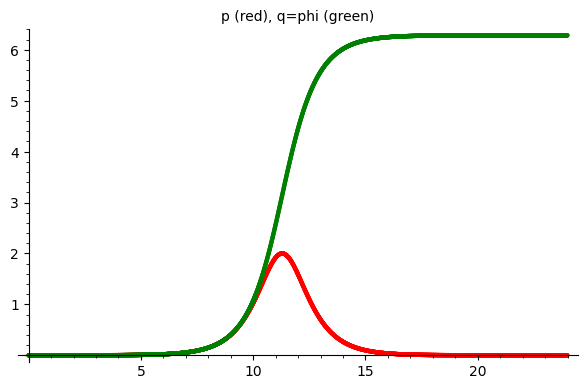

In [34]:
p  = list_plot(t_p, color="red")
p += list_plot(t_q, color="green")
p.show(title="p (red), q=phi (green)")

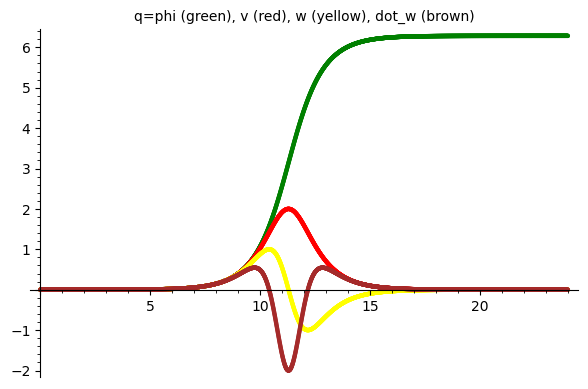

In [35]:
p  = list_plot(t_q,  color="green")
p += list_plot(t_v,  color="red")
p += list_plot(t_w,  color="yellow")
p += list_plot(t_dw, color="brown")
p.show(title="q=phi (green), v (red), w (yellow), dot_w (brown)")